In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df.shape
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

In [6]:
labels = pd.DataFrame(data.target, columns= data.target_names)
labels.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42, shuffle=True)
#20% of the total data is kept as test data


In [10]:
Train_data = pd.concat([X_train, y_train], axis = 'columns', #Join along the columns
                       names=[ 'MedInc' , 'HouseAge ', 'AveRooms','AveBedrms','Population' ,'Population','Latitude','Longitude','MedHouseVal'])


In [11]:

#Print summary statistics
Train_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
corr_mat = Train_data.corr(method ='pearson') #Pearson correlation is used
corr_mat


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.121711,0.336013,-0.072550,0.004122,0.022061,-0.076571,-0.017040,0.690647
HouseAge,-0.121711,1.000000,-0.160892,-0.087983,-0.292283,0.016245,0.005296,-0.101818,0.103706
AveRooms,0.336013,-0.160892,1.000000,0.836163,-0.073733,-0.004922,0.110695,-0.029339,0.158485
AveBedrms,-0.072550,-0.087983,0.836163,1.000000,-0.071267,-0.006035,0.073161,0.016647,-0.051351
Population,0.004122,-0.292283,-0.073733,-0.071267,1.000000,0.072330,-0.102499,0.094276,-0.026032
AveOccup,0.022061,0.016245,-0.004922,-0.006035,0.072330,1.000000,0.005837,-0.000598,-0.022030
Latitude,-0.076571,0.005296,0.110695,0.073161,-0.102499,0.005837,1.000000,-0.924485,-0.142983
Longitude,-0.017040,-0.101818,-0.029339,0.016647,0.094276,-0.000598,-0.924485,1.000000,-0.046349
MedHouseVal,0.690647,0.103706,0.158485,-0.051351,-0.026032,-0.022030,-0.142983,-0.046349,1.000000


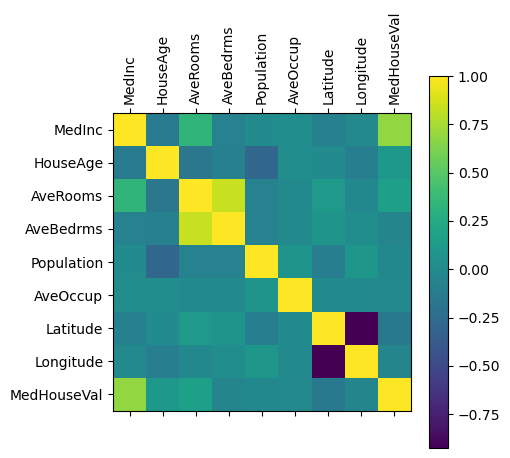

In [13]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()


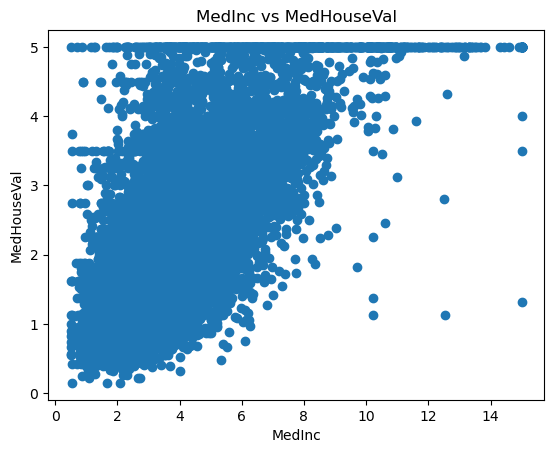

In [15]:
plt.scatter(X_train['MedInc'], y_train)
plt.title("MedInc vs MedHouseVal")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

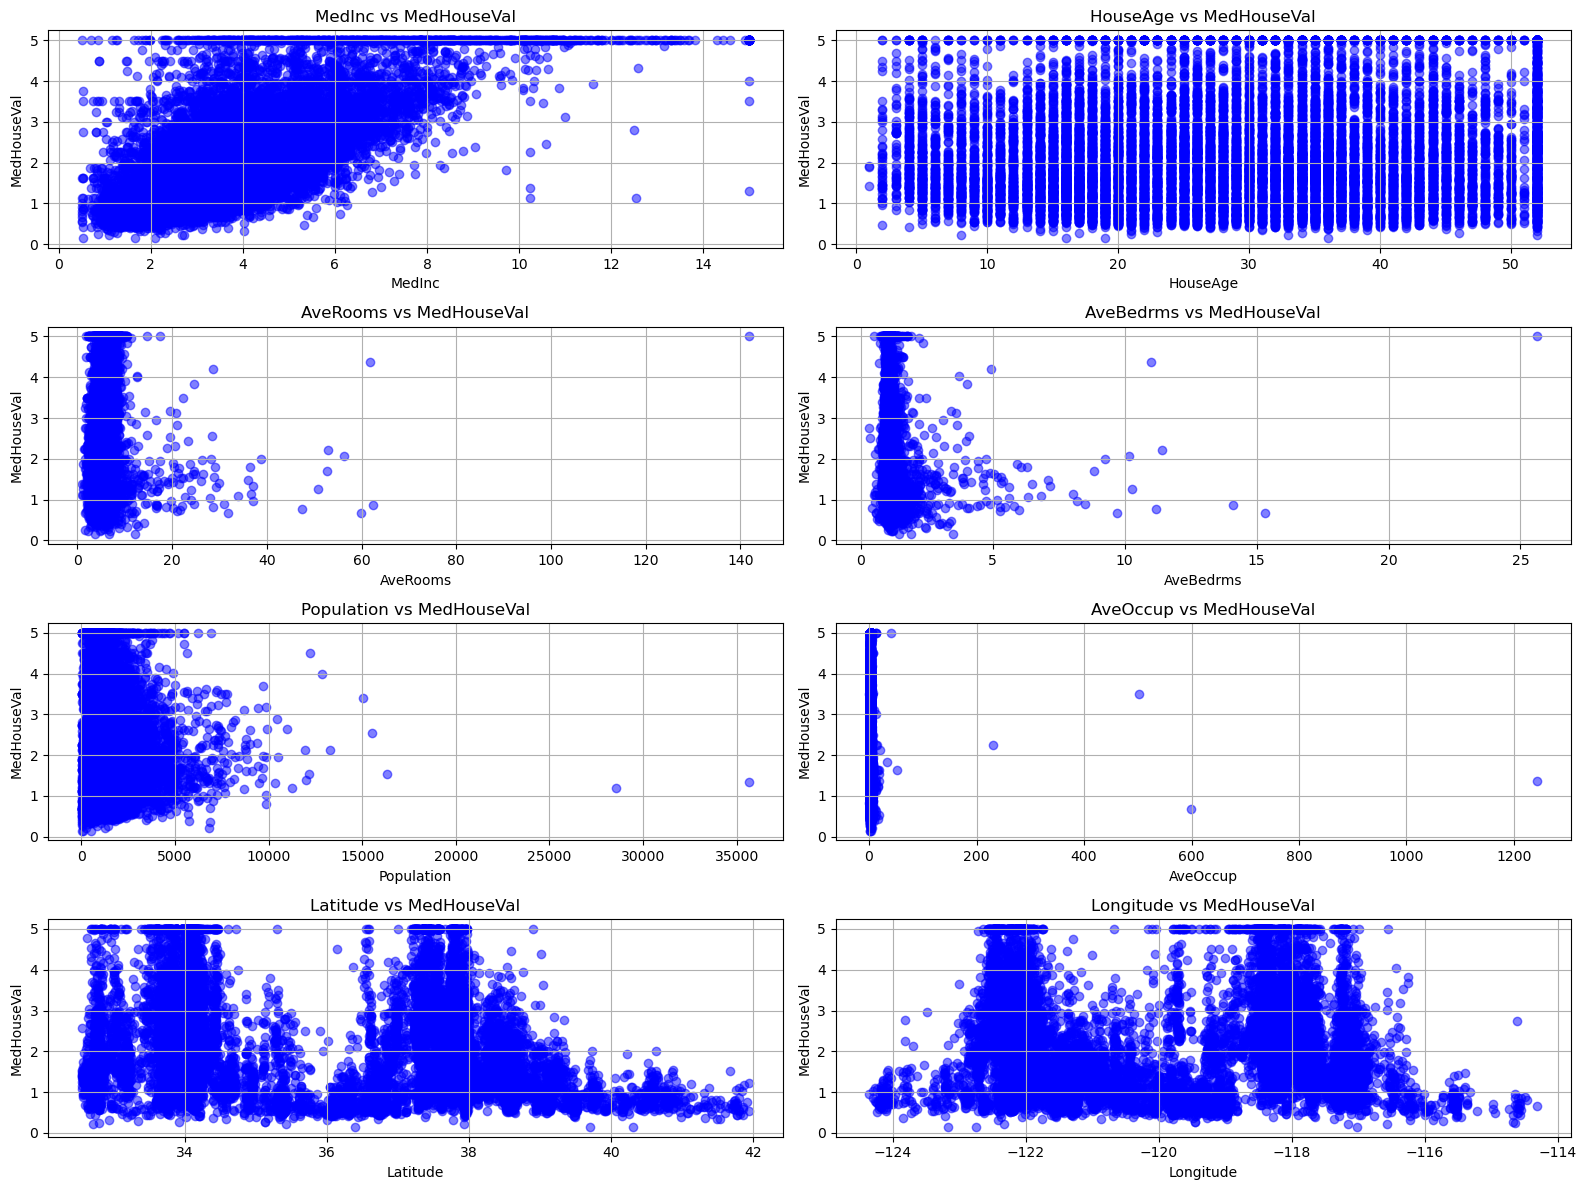

In [17]:
import matplotlib.pyplot as plt

# List of all feature names
features = X_train.columns

# Set up the plot grid: 4 rows x 2 columns (8 total features)
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)  # 4 rows, 2 columns
    plt.scatter(X_train[feature], y_train, alpha=0.5, color='blue')
    plt.title(f"{feature} vs MedHouseVal")
    plt.xlabel(feature)
    plt.ylabel("MedHouseVal")
    plt.grid(True)

plt.tight_layout()
plt.show()


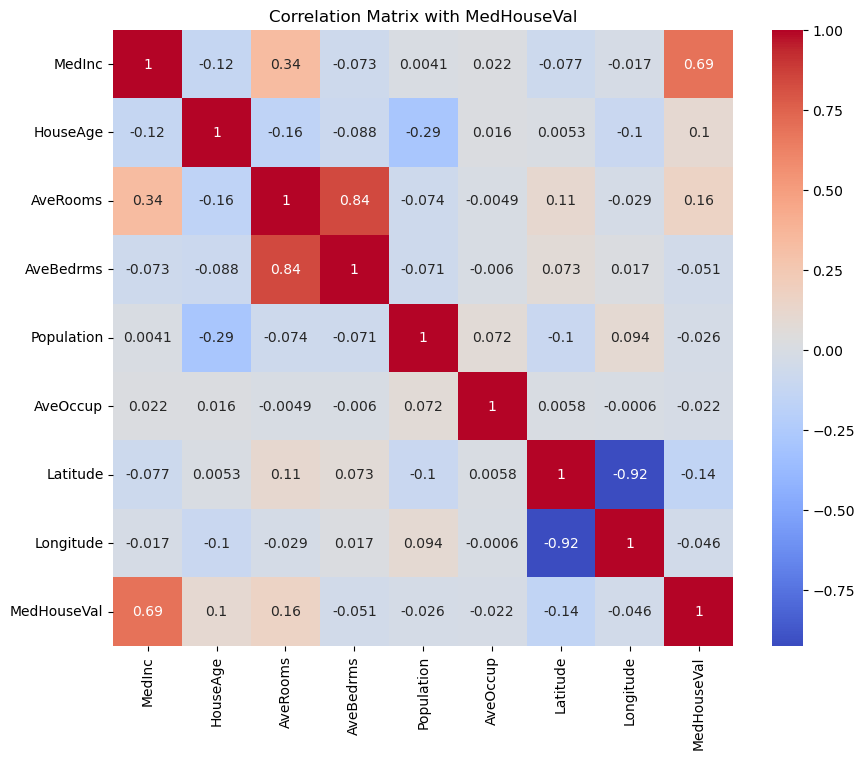

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine target with features
full_df = X_train.copy()
full_df['MedHouseVal'] = y_train

# Correlation matrix
correlation_matrix = full_df.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with MedHouseVal")
plt.show()


In [23]:
import pandas as pd

# Combine features and target into one DataFrame
df_clean = X_train.copy()
df_clean['MedHouseVal'] = y_train

# Identify numeric columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers using IQR
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Check the shape of the cleaned data
print("Shape after outlier removal:", df_clean.shape)


Shape after outlier removal: (12970, 9)


In [26]:
# Split df_clean into features and target
X_train_clean = df_clean.drop(columns='MedHouseVal')
y_train_clean = df_clean['MedHouseVal']


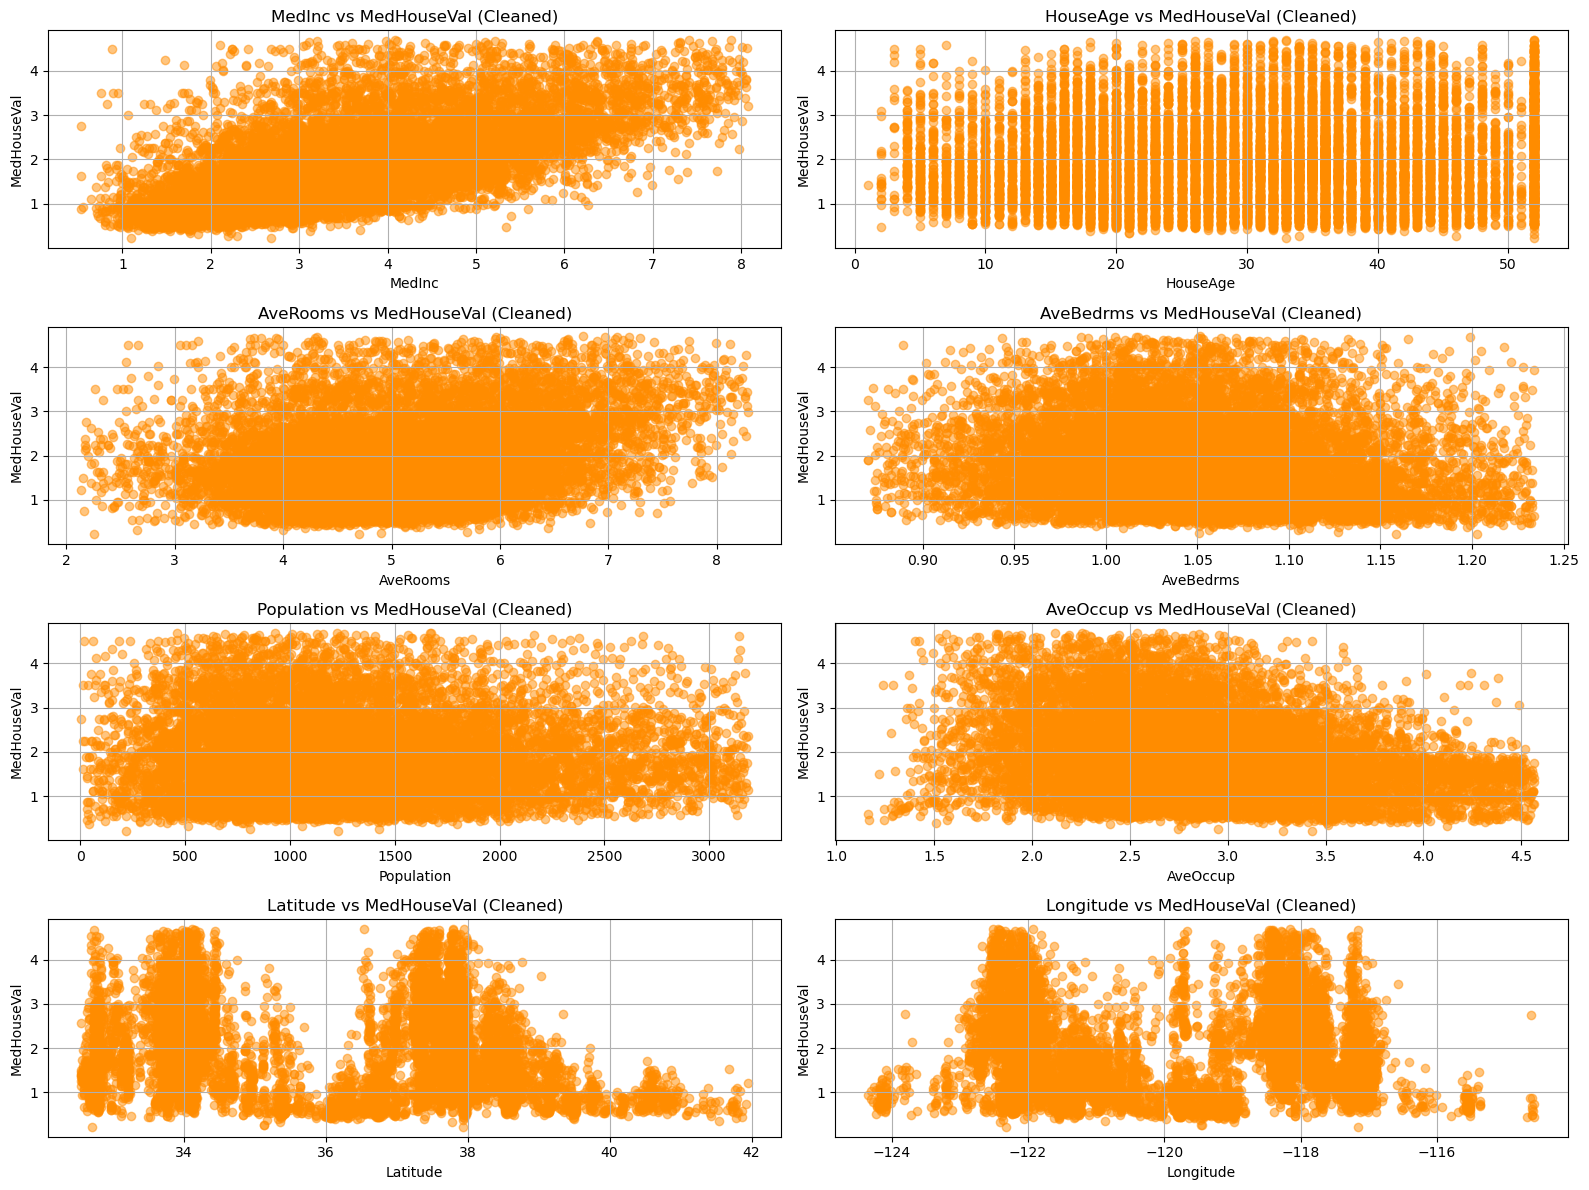

In [27]:
import matplotlib.pyplot as plt

# List of features
features = X_train_clean.columns

# Set up the plot grid: 4 rows × 2 columns = 8 subplots
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    plt.scatter(X_train_clean[feature], y_train_clean, alpha=0.5, color='darkorange')
    plt.title(f"{feature} vs MedHouseVal (Cleaned)")
    plt.xlabel(feature)
    plt.ylabel("MedHouseVal")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train the model
model = LinearRegression()
model.fit(X_train_clean, y_train_clean)

# Predict on training data
y_pred_train = model.predict(X_train_clean)

# Evaluation metrics
mae = mean_absolute_error(y_train_clean, y_pred_train)
mse = mean_squared_error(y_train_clean, y_pred_train)
rmse = mse ** 0.5
r2 = r2_score(y_train_clean, y_pred_train)

# Print results
print("📊 Linear Regression Performance (Cleaned Data):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Linear Regression Performance (Cleaned Data):
Mean Absolute Error (MAE): 0.4231
Root Mean Squared Error (RMSE): 0.5580
R² Score: 0.6408


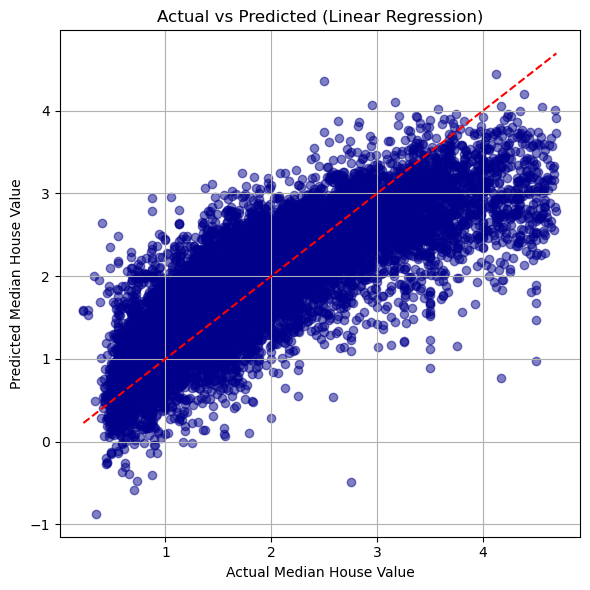

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(y_train_clean, y_pred_train, alpha=0.5, color='darkblue')
plt.plot([y_train_clean.min(), y_train_clean.max()],
         [y_train_clean.min(), y_train_clean.max()],
         'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
X_test_clean = X_test.copy()
y_test_clean = y_test.copy()

for col in X_test_clean.columns:
    Q1 = X_test_clean[col].quantile(0.25)
    Q3 = X_test_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (X_test_clean[col] >= lower) & (X_test_clean[col] <= upper)
    X_test_clean = X_test_clean[mask]
    y_test_clean = y_test_clean[mask]
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred_test = model.predict(X_test_clean)

# Evaluate
mae_test = mean_absolute_error(y_test_clean, y_pred_test)
rmse_test = mean_squared_error(y_test_clean, y_pred_test) ** 0.5
r2_test = r2_score(y_test_clean, y_pred_test)

print("📊 Test Set Performance:")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")


📊 Test Set Performance:
Mean Absolute Error (MAE): 0.4717
Root Mean Squared Error (RMSE): 0.6552
R² Score: 0.6145


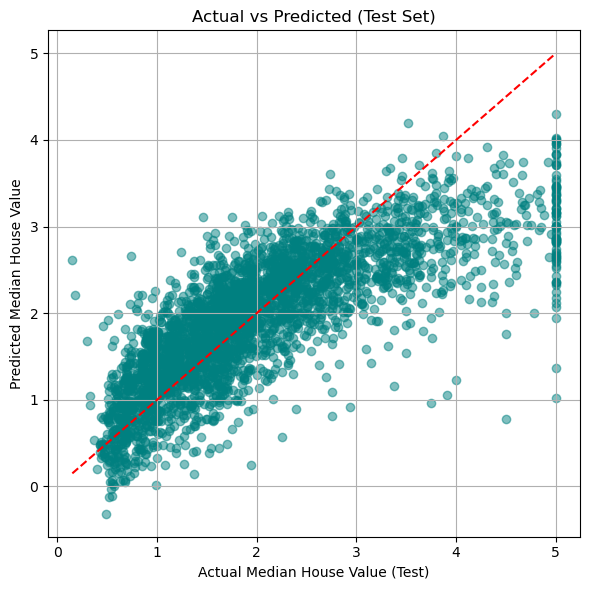

In [31]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_clean, y_pred_test, alpha=0.5, color='teal')
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()],
         'r--')
plt.xlabel("Actual Median House Value (Test)")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
import joblib
import pandas as pd

# Save model
joblib.dump(model, 'linear_regression_model.pkl')

# Make sure target is 1D
actual = y_test_clean.squeeze()

# Save predictions to CSV
pred_df = pd.DataFrame({
    'Actual': actual,
    'Predicted': y_pred_test
})

pred_df.to_csv('test_predictions.csv', index=False)

# (Optional) Save cleaned training data
df_clean.to_csv('cleaned_training_data.csv', index=False)

print("✅ Model and predictions saved successfully.")


✅ Model and predictions saved successfully.


In [37]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'California_House_prediction.ipynb', 'cleaned_training_data.csv', 'linear_regression_model.pkl', 'test_predictions.csv', 'tracstrom', 'Untitled.ipynb', 'Untitled1.ipynb']


In [39]:
import os
os.getcwd()


'C:\\Users\\raj\\Untitled Folder'